In [60]:
import tensorflow as tf
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

import skimage
from skimage import io
from skimage.transform import resize

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import pandas as pd
import seaborn as sn

Linki
 - https://drive.google.com/drive/folders/1bhnMJ8NbCa-qw53EKy-olZp3cJKZU_jc
 - https://drive.google.com/drive/folders/1X5HdFvgWJOVtA-GxBLr1K_0FHJS2RZcZ
 - https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=9528382&tag=1

In [61]:
train_dir = os.path.join(sys.path[0], 'train/')
test_dir = os.path.join(sys.path[0], 'test/')

In [62]:
def readHieroglyphData(data_dir):
    images = []
    targets = []
    for hier in os.listdir(data_dir):
        if not os.path.isdir(os.path.join(data_dir, hier)):
            continue
        for img in os.listdir(os.path.join(data_dir, hier)):
            targets.append(hier)
            images.append(np.asarray(io.imread(os.path.join(data_dir, hier, img))))
    return images, targets

In [63]:
def resizeImageData(data, image_size):
    resize_func = lambda img: resize(img, (image_size, image_size), anti_aliasing=True)
    resized_data = list(map(resize_func, data))
    return resized_data

In [64]:
images_train, targets_train = readHieroglyphData(train_dir)

In [65]:
images_test, targets_test = readHieroglyphData(test_dir)

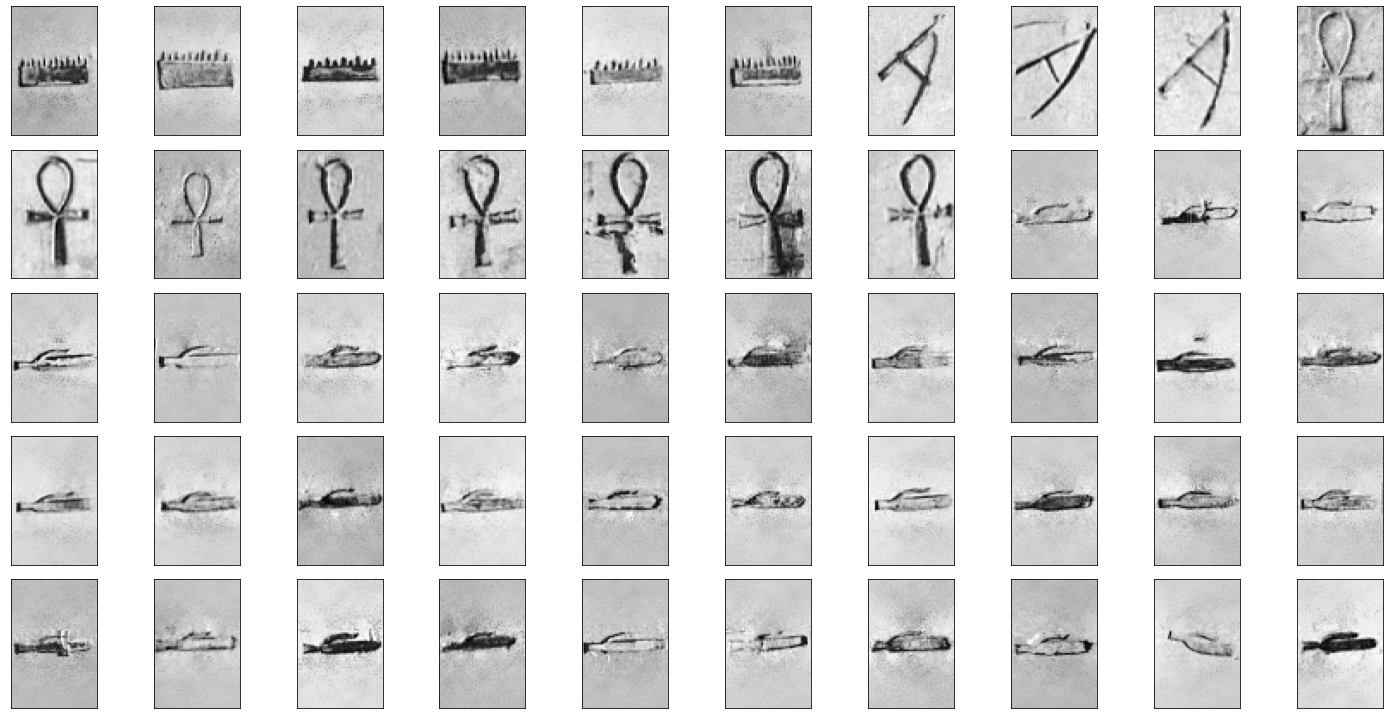

In [66]:
def overview(start, end, X):
    fig = plt.figure(figsize=(20,20))
    for i in range(start, end):
        ax = fig.add_subplot(10,10,i+1)
        ax.imshow(X[i], cmap='gray')
        plt.xticks(np.array([]))
        plt.yticks(np.array([]))
        plt.tight_layout()
    plt.show()

overview(0, 50, images_train)

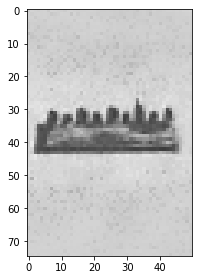

Y5


In [8]:
io.imshow(images_test[0], cmap='gray')
io.show()
print(targets_test[0])

In [9]:
len(targets_train)

2467

In [10]:
len(targets_test)

635

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(targets_train)
LabelEncoder()
print(list(le.classes_))

['D2', 'D21', 'D36', 'D4', 'D46', 'D58', 'E23', 'E34', 'F31', 'F35', 'G1', 'G17', 'G43', 'I10', 'I9', 'M17', 'M23', 'N35', 'O1', 'O34', 'O4', 'O49', 'Q1', 'Q3', 'R4', 'R8', 'S29', 'S34', 'U7', 'V13', 'V28', 'V30', 'V31', 'W11', 'W24', 'X1', 'X8', 'Y1', 'Y5', 'Z1']


In [12]:
labels_train = le.transform(targets_train)
labels_test = le.transform(targets_test)

In [13]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

num_labels = len(le.classes_)
x_train = np.expand_dims(images_train, -1) / 255.
x_test = np.expand_dims(images_test, -1) / 255.

y_train = to_categorical(labels_train, num_labels)
y_test = to_categorical(labels_test, num_labels)

x_train.shape

(2467, 75, 50, 1)

In [67]:
from tensorflow.keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding='same',
               input_shape=(75, 50, 1)))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(32, (3, 3)))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3, 3), padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(64, (3, 3)))
model.add(layers.Activation('relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())

model.add(layers.Dense(392))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.1))

model.add(layers.Dense(num_labels))
model.add(layers.Activation('softmax'))

In [68]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 75, 50, 32)        320       
                                                                 
 activation_12 (Activation)  (None, 75, 50, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 73, 48, 32)        9248      
                                                                 
 activation_13 (Activation)  (None, 73, 48, 32)        0         
                                                                 
 batch_normalization_4 (Batc  (None, 73, 48, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 24, 32)       0         
 2D)                                                  

In [69]:
model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])

run_hist = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)])

Epoch 1/10
78/78 [==============================] - 8s 98ms/step - loss: 1.7105 - accuracy: 0.7515 - val_loss: 7.8438 - val_accuracy: 0.0016
Epoch 2/10
78/78 [==============================] - 8s 97ms/step - loss: 0.2903 - accuracy: 0.9258 - val_loss: 14.6960 - val_accuracy: 0.0016
Epoch 3/10
78/78 [==============================] - 8s 103ms/step - loss: 0.1571 - accuracy: 0.9627 - val_loss: 9.9104 - val_accuracy: 0.0047
Epoch 4/10
78/78 [==============================] - 8s 98ms/step - loss: 0.0884 - accuracy: 0.9814 - val_loss: 7.6689 - val_accuracy: 0.1906
Epoch 5/10
78/78 [==============================] - 8s 99ms/step - loss: 0.1037 - accuracy: 0.9761 - val_loss: 0.7583 - val_accuracy: 0.8031
Epoch 6/10
78/78 [==============================] - 8s 101ms/step - loss: 0.0610 - accuracy: 0.9826 - val_loss: 0.9182 - val_accuracy: 0.7858
Epoch 7/10
78/78 [==============================] - 8s 100ms/step - loss: 0.0466 - accuracy: 0.9858 - val_loss: 0.3294 - val_accuracy: 0.9150
Epoch 8/1

In [17]:
scores = model.evaluate(x_test, y_test)

print("Loss: " + str(scores[0]))
print("Accuracy: " + str(scores[1]))

20/20 [==============================] - 1s 28ms/step - loss: 0.2828 - accuracy: 0.9559
Loss: 0.28275197744369507
Accuracy: 0.9559054970741272


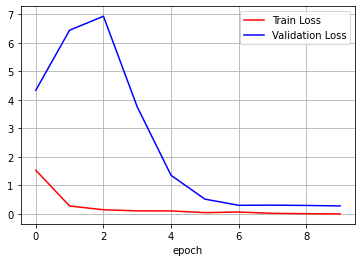

In [18]:
plt.plot(run_hist.history['loss'], color='r', label='Train Loss')
plt.plot(run_hist.history['val_loss'], color='b', label='Validation Loss')
plt.xlabel('epoch')
plt.legend()
plt.grid()
plt.show()

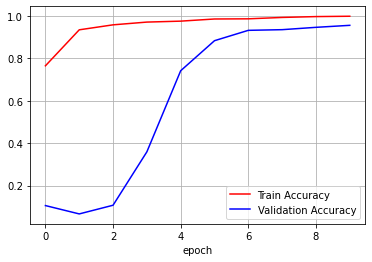

In [19]:
plt.plot(run_hist.history['accuracy'], color='r', label='Train Accuracy')
plt.plot(run_hist.history['val_accuracy'], color='b', label='Validation Accuracy')
plt.xlabel('epoch')
plt.legend()
plt.grid()
plt.show()

[Text(0.5, 123.0, 'Predicted label'), Text(168.0, 0.5, 'True label')]

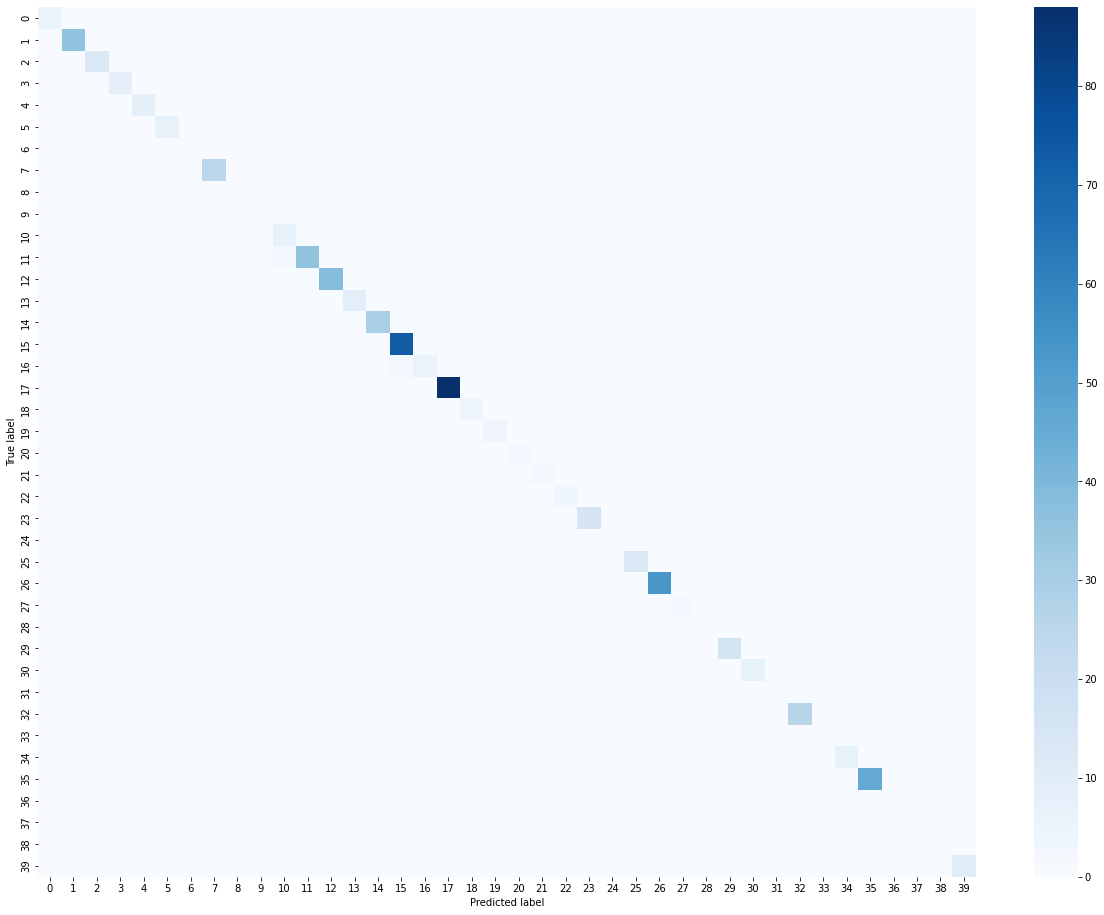

In [59]:
y_pred = [np.argmax(i) for i in model.predict(x_test)]
y_true = np.asarray([np.argmax(i) for i in y_test])

cm = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cm)

plt.figure(figsize = (21,16))
ax = sn.heatmap(df_cm, cmap="Blues")
ax.set(xlabel='Predicted label', ylabel='True label')

In [20]:
images_test32 = resizeImageData(images_test, 32)
images_train32 = resizeImageData(images_train, 32)

In [21]:
x_train_32 = np.expand_dims(images_train32, -1) / 255.
x_test_32 = np.expand_dims(images_test32, -1) / 255.

In [22]:
model32 = models.Sequential()
model32.add(layers.Conv2D(32, (3, 3), padding='same',
               input_shape=(32, 32, 1)))
model32.add(layers.Activation('relu'))
model32.add(layers.Conv2D(32, (3, 3)))
model32.add(layers.Activation('relu'))
model32.add(layers.BatchNormalization())
model32.add(layers.MaxPooling2D(pool_size=(2, 2)))
model32.add(layers.Dropout(0.25))

model32.add(layers.Conv2D(64, (3, 3), padding='same'))
model32.add(layers.Activation('relu'))
model32.add(layers.Conv2D(64, (3, 3)))
model32.add(layers.Activation('relu'))
model32.add(layers.BatchNormalization())
model32.add(layers.MaxPooling2D(pool_size=(2, 2)))
model32.add(layers.Dropout(0.25))

model32.add(layers.Flatten())

model32.add(layers.Dense(392))
model32.add(layers.Activation('relu'))
model32.add(layers.Dropout(0.1))

model32.add(layers.Dense(num_labels))
model32.add(layers.Activation('softmax'))

In [23]:
model32.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        320       
                                                                 
 activation_6 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_7 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 batch_normalization_2 (Batc  (None, 30, 30, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                  

In [24]:
model32.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])

run_hist32 = model32.fit(
    np.array(x_train_32), np.array(y_train),
    epochs=10, 
    validation_data=(np.array(x_test_32), np.array(y_test)))

Epoch 1/10
78/78 [==============================] - 3s 36ms/step - loss: 1.3891 - accuracy: 0.6465 - val_loss: 3.6584 - val_accuracy: 0.1606
Epoch 2/10
78/78 [==============================] - 3s 33ms/step - loss: 0.3654 - accuracy: 0.8983 - val_loss: 3.6099 - val_accuracy: 0.1575
Epoch 3/10
78/78 [==============================] - 3s 33ms/step - loss: 0.2329 - accuracy: 0.9283 - val_loss: 3.5241 - val_accuracy: 0.3606
Epoch 4/10
78/78 [==============================] - 3s 35ms/step - loss: 0.1563 - accuracy: 0.9530 - val_loss: 3.1992 - val_accuracy: 0.4772
Epoch 5/10
78/78 [==============================] - 3s 34ms/step - loss: 0.1210 - accuracy: 0.9591 - val_loss: 2.7066 - val_accuracy: 0.5480
Epoch 6/10
78/78 [==============================] - 3s 35ms/step - loss: 0.1011 - accuracy: 0.9672 - val_loss: 4.1865 - val_accuracy: 0.0031
Epoch 7/10
78/78 [==============================] - 3s 34ms/step - loss: 0.0685 - accuracy: 0.9793 - val_loss: 2.6239 - val_accuracy: 0.2142
Epoch 8/10
78

In [26]:
scores_32 = model32.evaluate(x_test_32, y_test)

print("Loss: " + str(scores_32[0]))
print("Accuracy: " + str(scores_32[1]))

20/20 [==============================] - 0s 11ms/step - loss: 0.8114 - accuracy: 0.8094
Loss: 0.8114034533500671
Accuracy: 0.8094488382339478


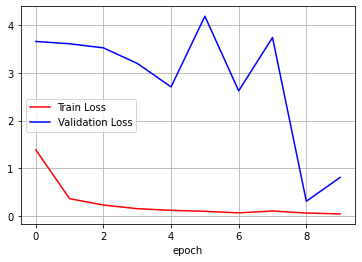

In [27]:
plt.plot(run_hist32.history['loss'], color='r', label='Train Loss')
plt.plot(run_hist32.history['val_loss'], color='b', label='Validation Loss')
plt.xlabel('epoch')
plt.legend()
plt.grid()
plt.show()

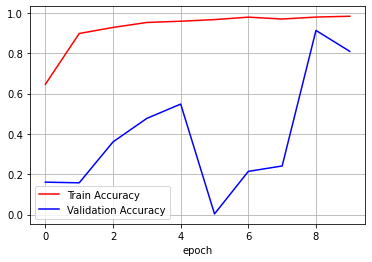

In [28]:
plt.plot(run_hist32.history['accuracy'], color='r', label='Train Accuracy')
plt.plot(run_hist32.history['val_accuracy'], color='b', label='Validation Accuracy')
plt.xlabel('epoch')
plt.legend()
plt.grid()
plt.show()

[Text(0.5, 123.0, 'Predicted label'), Text(168.0, 0.5, 'True label')]

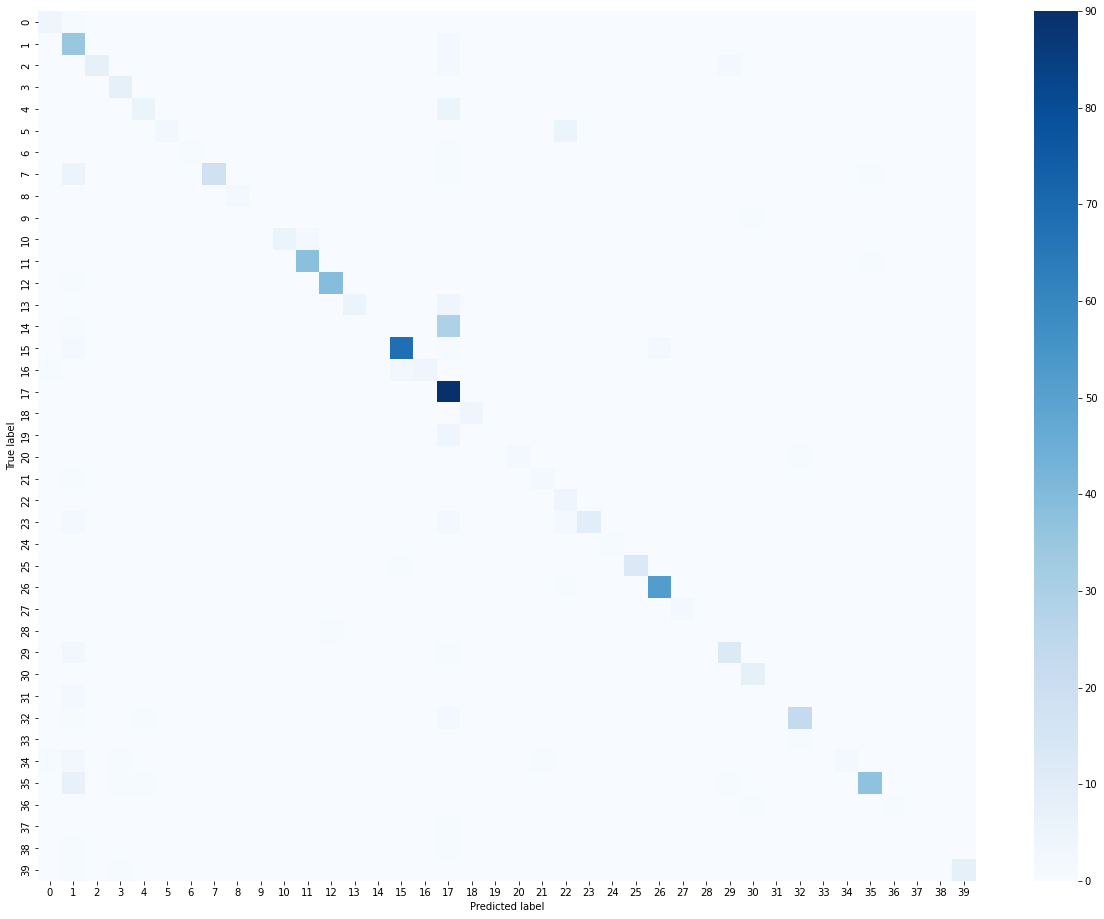

In [58]:
y_pred = [np.argmax(i) for i in model32.predict(x_test_32)]
y_true = np.asarray([np.argmax(i) for i in y_test])

cm = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cm)

plt.figure(figsize = (21,16))
ax = sn.heatmap(df_cm, cmap="Blues")
ax.set(xlabel='Predicted label', ylabel='True label')

In [36]:
from tensorflow.keras.applications import ResNet50

image_shape = (75, 50, 3)
base_model = ResNet50(include_top=False, input_shape=image_shape, pooling = 'avg', weights = 'imagenet')

modelResNet = models.Sequential()
modelResNet.add(base_model)
modelResNet.add(layers.Dropout(0.2))
modelResNet.add(layers.Dense(128, activation="relu"))
modelResNet.add(layers.Dropout(0.2))
modelResNet.add(layers.Dense(num_labels, activation = 'softmax'))

In [30]:
modelResNet.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dropout_6 (Dropout)         (None, 2048)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               262272    
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 40)                5160      
                                                                 
Total params: 23,855,144
Trainable params: 23,802,024
Non-trainable params: 53,120
_________________________________________________________________


In [37]:
#https://stackoverflow.com/questions/51995977/how-can-i-use-a-pre-trained-neural-network-with-grayscale-images
train_images_rgb = np.repeat(np.array(images_train)[..., np.newaxis], 3, -1)
test_images_rgb = np.repeat(np.array(images_test)[..., np.newaxis], 3, -1)

In [33]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

In [39]:
modelResNet.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

train_history = modelResNet.fit(
    train_images_rgb, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(test_images_rgb, y_test))

Epoch 1/10
39/39 [==============================] - 43s 1s/step - loss: 1.0411 - accuracy: 0.7657 - val_loss: 94.3949 - val_accuracy: 0.0740
Epoch 2/10
39/39 [==============================] - 42s 1s/step - loss: 0.2835 - accuracy: 0.9218 - val_loss: 7.8375 - val_accuracy: 0.6677
Epoch 3/10
39/39 [==============================] - 44s 1s/step - loss: 0.1381 - accuracy: 0.9676 - val_loss: 3.8947 - val_accuracy: 0.5496
Epoch 4/10
39/39 [==============================] - 45s 1s/step - loss: 0.1172 - accuracy: 0.9737 - val_loss: 2.6964 - val_accuracy: 0.7811
Epoch 5/10
39/39 [==============================] - 46s 1s/step - loss: 0.1182 - accuracy: 0.9777 - val_loss: 0.9383 - val_accuracy: 0.9244
Epoch 6/10
39/39 [==============================] - 46s 1s/step - loss: 0.0534 - accuracy: 0.9870 - val_loss: 1.1249 - val_accuracy: 0.7654
Epoch 7/10
39/39 [==============================] - 47s 1s/step - loss: 0.0466 - accuracy: 0.9870 - val_loss: 0.7544 - val_accuracy: 0.8331
Epoch 8/10
39/39 [=

In [41]:
scores_resnet = modelResNet.evaluate(test_images_rgb, y_test)

print("Loss: " + str(scores_resnet[0]))
print("Accuracy: " + str(scores_resnet[1]))

20/20 [==============================] - 2s 119ms/step - loss: 0.5080 - accuracy: 0.8740
Loss: 0.5080096125602722
Accuracy: 0.874015748500824


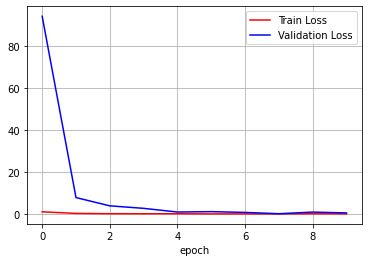

In [42]:
plt.plot(train_history.history['loss'], color='r', label='Train Loss')
plt.plot(train_history.history['val_loss'], color='b', label='Validation Loss')
plt.xlabel('epoch')
plt.legend()
plt.grid()
plt.show()

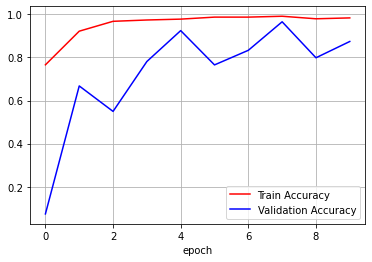

In [43]:
plt.plot(train_history.history['accuracy'], color='r', label='Train Accuracy')
plt.plot(train_history.history['val_accuracy'], color='b', label='Validation Accuracy')
plt.xlabel('epoch')
plt.legend()
plt.grid()
plt.show()

[Text(0.5, 123.0, 'Predicted label'), Text(168.0, 0.5, 'True label')]

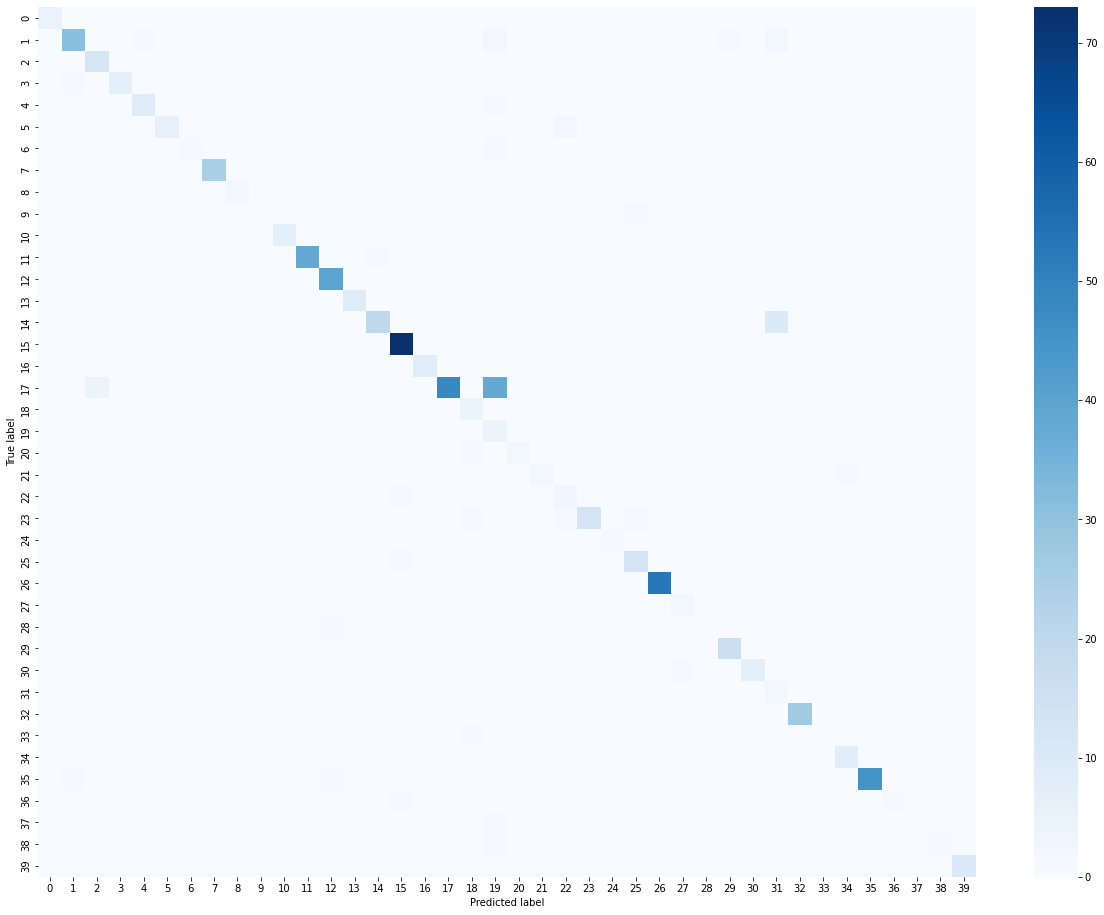

In [57]:
y_pred = [np.argmax(i) for i in modelResNet.predict(test_images_rgb)]
y_true = np.asarray([np.argmax(i) for i in y_test])

cm = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cm)

plt.figure(figsize = (21,16))
ax = sn.heatmap(df_cm, cmap="Blues")
ax.set(xlabel='Predicted label', ylabel='True label')